In [1]:
#library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn import metrics

# **Data Training**

# **Preprocessing**

In [2]:
#input dataframe training
df = pd.read_csv('salju_train (1).csv')

In [3]:
# Mengkonfigurasi, hanya ditampilkan beberapa dataset saja 
pd.set_option('display.max_rows', 20)
df

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,1,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,NaN,WSW,0.0,13.0,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,2,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,SW,WNW,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,3,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,SE,SE,15.0,26.0,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
3,4,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,N,SW,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,5,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,NNW,ESE,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109090,109091,31/01/2009,C38,20.1,23.7,0.0,7.2,8.9,ESE,43.0,SE,ESE,24.0,26.0,74.0,70.0,1019.3,1017.6,4.0,6.0,22.0,22.1,Tidak,Ya
109091,109092,03/11/2010,C16,15.7,25.2,0.0,NaN,NaN,SSE,37.0,SSE,E,28.0,19.0,52.0,52.0,1018.4,1016.2,NaN,NaN,23.8,24.4,Tidak,Ya
109092,109093,11/11/2010,C17,7.5,20.4,1.6,NaN,NaN,NW,33.0,N,NW,4.0,13.0,92.0,51.0,1014.5,1010.6,NaN,NaN,12.6,19.8,Ya,Tidak
109093,109094,16/04/2012,C11,10.8,29.8,0.0,7.8,11.2,E,48.0,ESE,SE,13.0,26.0,35.0,18.0,1020.0,1015.8,0.0,1.0,21.7,29.2,Tidak,Tidak


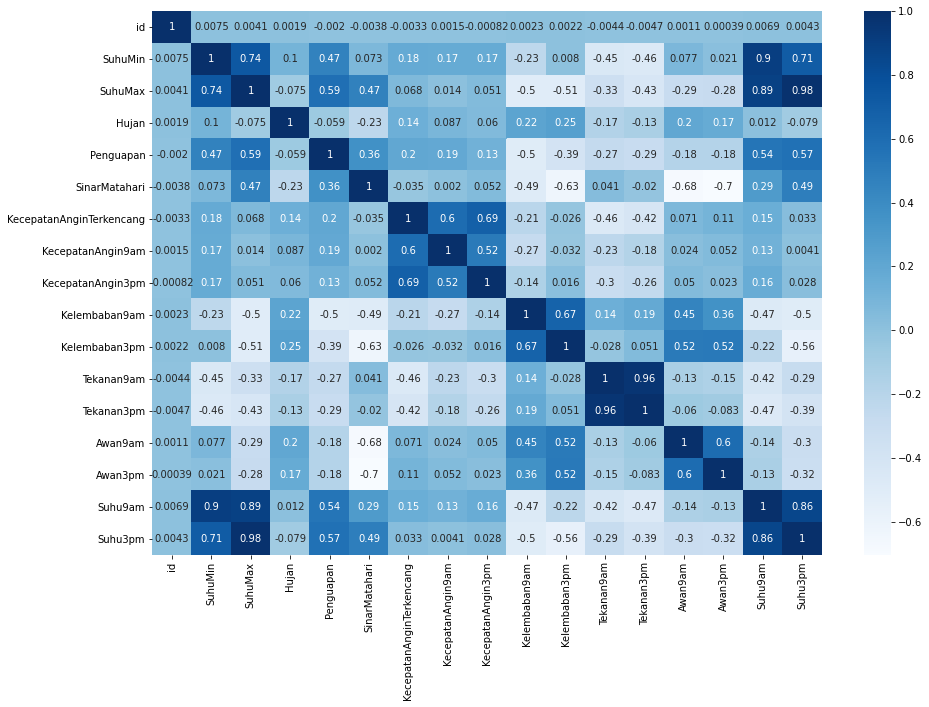

In [4]:
# Menampilkan korelasi antar atribut


plt.figure(figsize=(15,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [5]:
# Melakukan copy dataframe, hanya untuk beberapa atribut yang akan digunakan

prepared_data = df.loc[:,['SinarMatahari','SuhuMin','SuhuMax','BersaljuBesok']]
pd.set_option('display.max_rows', 20)
prepared_data

,SinarMatahari,SuhuMin,SuhuMax,BersaljuBesok
0,NaN,10.4,15.5,Tidak
1,7.4,9.0,17.0,Ya
2,NaN,18.2,32.0,Tidak
3,10.4,7.3,24.5,Tidak
4,12.6,5.9,20.3,Tidak
...,...,...,...,...
109090,8.9,20.1,23.7,Ya
109091,NaN,15.7,25.2,Ya
109092,NaN,7.5,20.4,Tidak
109093,11.2,10.8,29.8,Tidak


In [6]:
# Menghilangkan missing data dan data yang redundant

prepared_data = prepared_data.dropna()
prepared_data = prepared_data.drop_duplicates(keep='first')
prepared_data

,SinarMatahari,SuhuMin,SuhuMax,BersaljuBesok
1,7.4,9.0,17.0,Ya
3,10.4,7.3,24.5,Tidak
4,12.6,5.9,20.3,Tidak
5,4.4,14.4,21.8,Tidak
6,9.7,7.7,18.7,Tidak
...,...,...,...,...
109080,10.3,16.8,34.1,Tidak
109082,9.6,8.7,19.0,Tidak
109088,12.6,14.3,26.2,Tidak
109090,8.9,20.1,23.7,Ya


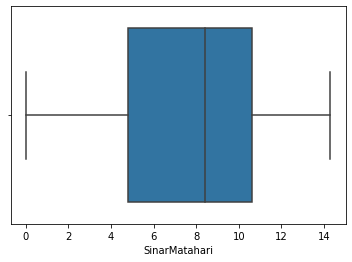

In [7]:
sns.boxplot(x=prepared_data['SinarMatahari'])

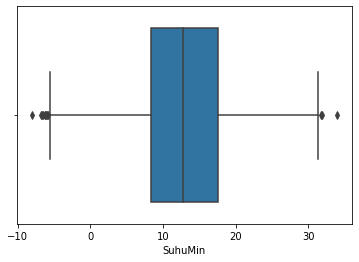

In [8]:
sns.boxplot(x=prepared_data['SuhuMin'])

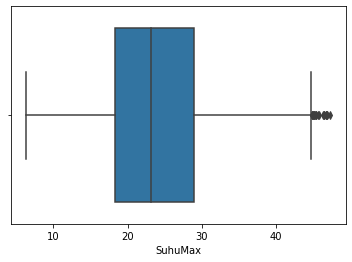

In [9]:
sns.boxplot(x=prepared_data['SuhuMax'])

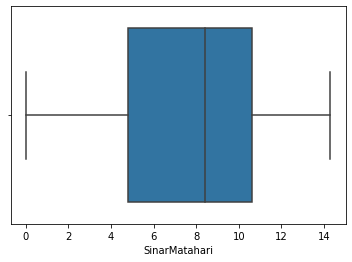

In [10]:
# Menghilangkan data Quartil/outlers Fitur Penguapan
Q1 = prepared_data['SinarMatahari'].quantile(0.25)
Q3 = prepared_data['SinarMatahari'].quantile(0.75)
IQR = Q3 - Q1    

filter = (prepared_data['SinarMatahari'] >= Q1 - 1.5 * IQR) & (prepared_data['SinarMatahari'] <= Q3 + 1.5 *IQR)
prepared_data = prepared_data.loc[filter] 
sns.boxplot(x=prepared_data['SinarMatahari'])

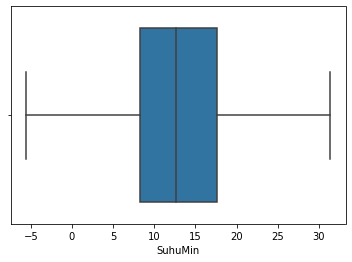

In [11]:
# Menghilangkan data Quartil/outlers Fitur Suhu Min
Q1 = prepared_data['SuhuMin'].quantile(0.25)
Q3 = prepared_data['SuhuMin'].quantile(0.75)
IQR = Q3 - Q1    

filter = (prepared_data['SuhuMin'] >= Q1 - 1.5 * IQR) & (prepared_data['SuhuMin'] <= Q3 + 1.5 *IQR)
prepared_data = prepared_data.loc[filter] 
sns.boxplot(x=prepared_data['SuhuMin'])

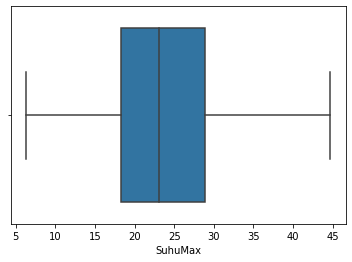

In [12]:
# Menghilangkan data Quartil/outlers Fitur Suhu Max
Q1 = prepared_data['SuhuMax'].quantile(0.25)
Q3 = prepared_data['SuhuMax'].quantile(0.75)
IQR = Q3 - Q1    

filter = (prepared_data['SuhuMax'] >= Q1 - 1.5 * IQR) & (prepared_data['SuhuMax'] <= Q3 + 1.5 *IQR)
prepared_data = prepared_data.loc[filter] 
sns.boxplot(x=prepared_data['SuhuMax'])

In [13]:
prepared_data = prepared_data.reset_index(drop=True)
prepared_data


,SinarMatahari,SuhuMin,SuhuMax,BersaljuBesok
0,7.4,9.0,17.0,Ya
1,10.4,7.3,24.5,Tidak
2,12.6,5.9,20.3,Tidak
3,4.4,14.4,21.8,Tidak
4,9.7,7.7,18.7,Tidak
...,...,...,...,...
55210,10.3,16.8,34.1,Tidak
55211,9.6,8.7,19.0,Tidak
55212,12.6,14.3,26.2,Tidak
55213,8.9,20.1,23.7,Ya


In [14]:
#Memisahkan Target Kelas
labelencoder = preprocessing.LabelEncoder()

prepared_data['BersaljuBesok'] = labelencoder.fit_transform(prepared_data['BersaljuBesok'])

prepared_data
Y_Training = prepared_data['BersaljuBesok'].values
print(Y_Training)

[1 0 0 ... 0 1 0]


# **Normalisasi Data**

In [15]:
prepared_data = prepared_data.drop(columns=['BersaljuBesok']) 

In [16]:
#Data Sebelum Normalisasi
prepared_data

,SinarMatahari,SuhuMin,SuhuMax
0,7.4,9.0,17.0
1,10.4,7.3,24.5
2,12.6,5.9,20.3
3,4.4,14.4,21.8
4,9.7,7.7,18.7
...,...,...,...
55210,10.3,16.8,34.1
55211,9.6,8.7,19.0
55212,12.6,14.3,26.2
55213,8.9,20.1,23.7


In [17]:
data = prepared_data.loc[:,['SinarMatahari','SuhuMin','SuhuMax']]
def z_score(df):
   df.columns = [x  for x in df.columns.tolist()]
   return ((df - df.mean())/df.std(ddof=0))

X_training = z_score(data)
X_training

,SinarMatahari,SuhuMin,SuhuMax
0,-0.056282,-0.634589,-0.968314
1,0.736886,-0.905503,0.115510
2,1.318543,-1.128608,-0.491432
3,-0.849450,0.225960,-0.274667
4,0.551814,-0.841758,-0.722647
...,...,...,...
55210,0.710447,0.608427,1.502804
55211,0.525375,-0.682397,-0.679294
55212,1.318543,0.210024,0.361176
55213,0.340302,1.134318,-0.000098


# **Data Testing**

# **Preprocessing**

In [18]:
# Membaca dataset testing Salju dan memasukannya kedalam data frame
dftest = pd.read_csv('salju_test (1).csv')
# Mengkonfigurasi, hanya ditampilkan beberapa dataset saja 
pd.set_option('display.max_rows', 20)
dftest

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,04/11/2010,C39,11.0,27.5,0.0,NaN,6.4,WSW,46.0,W,W,20.0,28.0,39.0,56.0,1013.0,1012.4,4.0,7.0,25.7,23.6,No,No
1,26/03/2015,C35,10.0,19.9,0.2,NaN,NaN,WNW,56.0,W,NW,24.0,33.0,76.0,32.0,1017.0,1015.2,8.0,1.0,10.7,18.9,No,Yes
2,22/03/2016,C18,9.2,27.2,0.0,5.2,10.4,SSW,33.0,NE,N,13.0,19.0,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,No,No
3,09/12/2011,C31,17.7,27.0,0.0,4.6,6.7,SW,35.0,E,SSE,20.0,15.0,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,No,No
4,20/05/2017,C14,2.3,7.9,88.0,NaN,NaN,NW,46.0,W,WNW,13.0,9.0,98.0,95.0,NaN,NaN,NaN,NaN,4.4,6.0,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,14/11/2012,C40,7.8,25.8,0.0,8.0,13.2,NE,31.0,ENE,NW,22.0,13.0,59.0,21.0,1017.1,1014.2,6.0,1.0,16.8,24.0,No,No
18178,24/10/2015,C40,12.4,26.6,0.0,8.0,11.6,NW,37.0,NE,WNW,17.0,20.0,59.0,25.0,1022.2,1018.7,1.0,1.0,17.1,25.7,No,No
18179,31/08/2010,C21,6.7,22.9,0.0,NaN,NaN,NaN,NaN,NaN,NW,0.0,4.0,84.0,35.0,NaN,NaN,1.0,2.0,11.8,22.0,No,No
18180,24/08/2013,C12,12.5,26.7,0.0,9.0,10.8,NE,35.0,SW,ENE,2.0,26.0,56.0,45.0,1021.9,1018.1,5.0,5.0,22.9,25.4,No,No


In [19]:
# Melakukan copy dataframe, hanya untuk beberapa atribut yang akan digunakan

prepared_datatest = dftest.loc[:,['SinarMatahari','SuhuMin','SuhuMax','BersaljuBesok']]
pd.set_option('display.max_rows', 20)
prepared_datatest

,SinarMatahari,SuhuMin,SuhuMax,BersaljuBesok
0,6.4,11.0,27.5,No
1,NaN,10.0,19.9,Yes
2,10.4,9.2,27.2,No
3,6.7,17.7,27.0,No
4,NaN,2.3,7.9,No
...,...,...,...,...
18177,13.2,7.8,25.8,No
18178,11.6,12.4,26.6,No
18179,NaN,6.7,22.9,No
18180,10.8,12.5,26.7,No


In [20]:
# Menghilangkan missing data dan data yang redundant

prepared_datatest = prepared_datatest.dropna()
prepared_datatest = prepared_datatest.drop_duplicates(keep='first')
prepared_datatest

,SinarMatahari,SuhuMin,SuhuMax,BersaljuBesok
0,6.4,11.0,27.5,No
2,10.4,9.2,27.2,No
3,6.7,17.7,27.0,No
6,1.0,12.4,14.5,Yes
7,3.9,14.4,22.4,No
...,...,...,...,...
18170,9.7,13.4,24.9,No
18174,10.1,14.6,27.8,No
18177,13.2,7.8,25.8,No
18178,11.6,12.4,26.6,No


In [21]:
# Menghilangkan Outliers/Kuartil Fitur Penguapan
Q1 = prepared_datatest['SinarMatahari'].quantile(0.25)
Q3 = prepared_datatest['SinarMatahari'].quantile(0.75)
IQR = Q3 - Q1    

filter = (prepared_datatest['SinarMatahari'] >= Q1 - 1.5 * IQR) & (prepared_datatest['SinarMatahari'] <= Q3 + 1.5 *IQR)
prepared_datatest = prepared_datatest.loc[filter] 

In [22]:
# Menghilangkan Outliers/Kuartil Fitur SuhuMin
Q1 = prepared_datatest['SuhuMin'].quantile(0.25)
Q3 = prepared_datatest['SuhuMin'].quantile(0.75)
IQR = Q3 - Q1    

filter = (prepared_datatest['SuhuMin'] >= Q1 - 1.5 * IQR) & (prepared_datatest['SuhuMin'] <= Q3 + 1.5 *IQR)
prepared_datatest = prepared_datatest.loc[filter] 

In [23]:
# Menghilangkan Outliers/Kuartil Fitur SuhuMin
Q1 = prepared_datatest['SuhuMax'].quantile(0.25)
Q3 = prepared_datatest['SuhuMax'].quantile(0.75)
IQR = Q3 - Q1    

filter = (prepared_datatest['SuhuMax'] >= Q1 - 1.5 * IQR) & (prepared_datatest['SuhuMax'] <= Q3 + 1.5 *IQR)
prepared_datatest = prepared_datatest.loc[filter] 

In [24]:
#Memisahkan Target Kelas
labelencoder = preprocessing.LabelEncoder()

prepared_datatest['BersaljuBesok'] = labelencoder.fit_transform(prepared_datatest['BersaljuBesok'])
Y_Test = prepared_datatest['BersaljuBesok'].values
Y_Testing = prepared_datatest.loc[:,['BersaljuBesok']]
Y_Testing.to_csv('Cek Kebenaran Data.csv ')

In [25]:
prepared_datatest = prepared_datatest.drop(columns=['BersaljuBesok']) 

# **Normalisasi Data**

In [26]:
dataa = prepared_datatest.loc[:,['SinarMatahari','SuhuMin','SuhuMax']]
def z_score(df):
   df.columns = [x  for x in df.columns.tolist()]
   return ((df - df.mean())/df.std(ddof=0))

X_Test = z_score(dataa)
X_Test

,SinarMatahari,SuhuMin,SuhuMax
0,-0.328499,-0.324022,0.520949
2,0.726994,-0.607171,0.478045
3,-0.249337,0.729921,0.449443
6,-1.753415,-0.103795,-1.338203
7,-0.988183,0.210815,-0.208411
...,...,...,...
18170,0.542283,0.053510,0.149118
18174,0.647832,0.242276,0.563852
18177,1.465839,-0.827398,0.277829
18178,1.043642,-0.103795,0.392238


# **Klasifikasi Dengan KNN**

In [27]:
# Import KNN Model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=27)
model.fit(X_training,Y_Training)
y_pred = model.predict(X_Test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
#cek Hasil Kebenaran Prediksi dai Y_test
np.array(Y_Test)

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
#Hitung Akurasi Kebenaran Data
from sklearn import metrics
print('Accuracy :', metrics.accuracy_score(Y_Test,y_pred)*100)

Accuracy : 80.05178552163125


In [46]:
model.predict_proba(X_Test)

array([[0.7037037 , 0.2962963 ],
       [1.        , 0.        ],
       [0.77777778, 0.22222222],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.92592593, 0.07407407]])

In [30]:
# import confusion_matrix model
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_Test, y_pred)

array([[6679,  479],
       [1370,  741]])

In [31]:
# Merapikan hasil confusion matrix
y_actual1 = pd.Series(Y_Test, name = 'Aktual')
y_pred1 = pd.Series(y_pred, name = 'Prediksi')
hasil_confusion1 = pd.crosstab(y_actual1, y_pred1)
hasil_confusion1

Prediksi,0,1
Aktual,,
0,6679,479
1,1370,741


In [32]:
from sklearn.metrics import classification_report
print(classification_report(Y_Test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      7158
           1       0.61      0.35      0.44      2111

    accuracy                           0.80      9269
   macro avg       0.72      0.64      0.66      9269
weighted avg       0.78      0.80      0.78      9269



In [33]:
# Simpan Prediksi Data KNN 
y_pred = pd.DataFrame((y_pred),columns=['Hasil Klasifikasi'])
y_pred.to_csv('data hasil Klasifikasi KNN.csv')

# **Klasifikasi Dengan Naive Bayes**

In [34]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [35]:
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive bayes
gnb = GaussianNB()

In [36]:
# Memasukkan data training pada fungsi klasifikasi naive bayes
gnb.fit(X_training,Y_Training)

GaussianNB(priors=None, var_smoothing=1e-09)

In [37]:
# Menentukan hasil prediksi dari x_test
y_predd = gnb.predict(X_Test)
y_predd

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
#cek Hasil Kebenaran Prediksi dai Y_test
np.array(Y_Test)

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
#Akurasi Kebenaran data
from sklearn import metrics
print('Accuracy :', metrics.accuracy_score(Y_Test,y_predd)*100)

Accuracy : 78.60610637609236


In [47]:
gnb.predict_proba(X_Test)

array([[0.81413229, 0.18586771],
       [0.94984127, 0.05015873],
       [0.79682774, 0.20317226],
       ...,
       [0.98031335, 0.01968665],
       [0.96273825, 0.03726175],
       [0.95096301, 0.04903699]])

In [41]:
# import confusion_matrix model
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_Test, y_predd)

array([[6376,  782],
       [1201,  910]])

In [42]:
# Merapikan hasil confusion matrix
y_actual1 = pd.Series(Y_Test, name = 'Actual')
y_pred1 = pd.Series(y_predd, name = 'prediction')
hasil_confusion2 = pd.crosstab(y_actual1, y_pred1)
hasil_confusion2

prediction,0,1
Actual,,
0,6376,782
1,1201,910


In [43]:
# Menghitung nilai akurasi dari klasifikasi naive bayes 
from sklearn.metrics import classification_report
print(classification_report(Y_Test, y_predd))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      7158
           1       0.54      0.43      0.48      2111

    accuracy                           0.79      9269
   macro avg       0.69      0.66      0.67      9269
weighted avg       0.77      0.79      0.78      9269



In [44]:
#Prediksi Data Naive Bayes
y_predd = model.predict(X_Test)
y_predd = pd.DataFrame((y_pred),columns=['Hasil Klasifikasi'])
y_predd.to_csv('data hasil Klasifikasi Naive Bayes.csv')